In [1]:
from simsopt.mhd import Vmec
from simsopt._core.optimizable import load
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

In [5]:
bs = load('coils.curves_22_7_21')
v = Vmec('input.vmec')
s = v.boundary

ValueError: Invalid format: `curves_22_7_21`

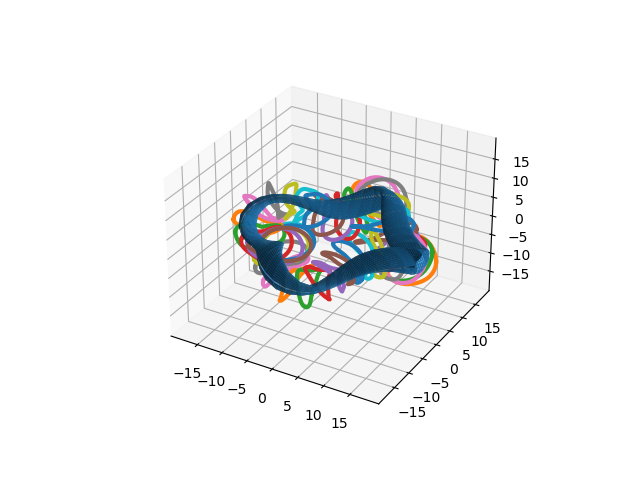

In [3]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
s.plot(ax=ax,show=False)
for c in bs.coils:
    c.curve.plot(ax=ax,show=False,linewidth=3)

Text(0.5, 0, '$\\theta$')

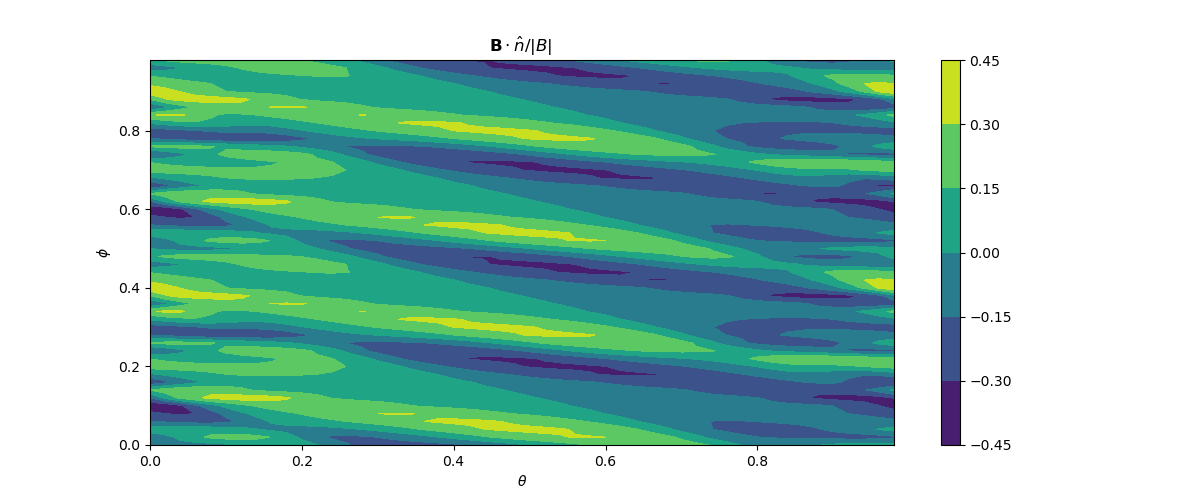

In [4]:
surf = s
theta = surf.quadpoints_theta
phi = surf.quadpoints_phi
ntheta = theta.size
nphi = phi.size
bs.set_points(surf.gamma().reshape((-1,3)))
Bdotn = np.sum(bs.B().reshape((nphi, ntheta, 3)) * surf.unitnormal(), axis=2)
modB = bs.AbsB().reshape((nphi,ntheta))

fig, ax = plt.subplots(figsize=(12,5))
c = ax.contourf(theta,phi,Bdotn / modB)
plt.colorbar(c)
ax.set_title(r'$\mathbf{B}\cdot\hat{n} / |B|$ ')
ax.set_ylabel(r'$\phi$')
ax.set_xlabel(r'$\theta$')